In [1]:
#Import das Libs
import numpy as np
import cv2
from matplotlib import pyplot as plot

In [2]:
#Realiza-se o Upload das Imagem para o Google Colab.
#Em seguida, importa-se a imagem

img = cv2.imread('/content/Images/img01.jpg')

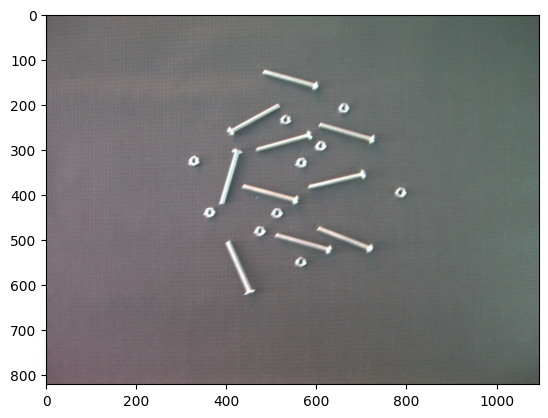

In [3]:
#Visualização da Imagem Importada
plot.imshow(img,cmap='gray')
plot.show()

In [4]:
#Separação em três bandas indenpendentes (BRG)
B, G, R = cv2.split(img)

In [5]:
#Converte-se a imagem colorida (BRG) para Escalas de Cinza
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
#Binarização de uma Imagem Grayscale por meio da Função THRESH_BINARY + THRESH_OTSU
otsu_threshold, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Valor Threshold: ", otsu_threshold)

Valor Threshold:  163.0


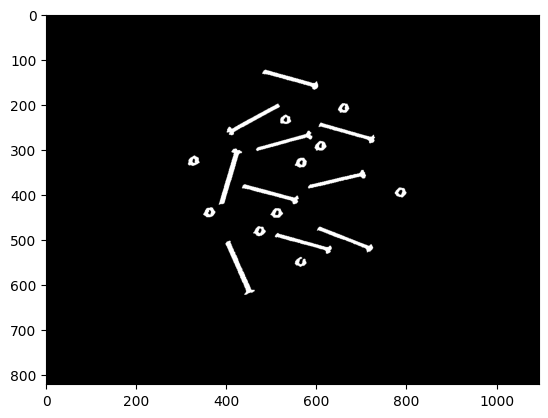

In [7]:
#Visualização da Imagem Binarizada por meio da Função THRESH_BINARY + THRESH_OTSU
plot.imshow(img_bin,cmap='gray')
plot.show()

<b> Fase de Binarização </b>

Quando o resultado da binarização não for satisfatório, o valor de Threshold (THRESH_BINARY) pode ser configurado manualmente. Para isto, utilizou-se a seguinte lógica para atingir o objetivo do sistema de visão computacional:

- Caso o número de componentes conexos detectados esteja acima de 100, utiliza-se o valor de <b>THRESH_BINARY</b> é atualizado para <b>215</b>.

In [8]:
#Análise dos componentes conexos, por meio de vizinhança de 8 pixels - 8-Conexo
(numCCs, imgLabels, stats, centroids) = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

In [9]:
#Binarização de uma Imagem Grayscale por meio da Função THRESH_BINARY
#T: Threshold (Número Inteiro entre: 0 a 255) = Valor escolhido para esta aplicação foi: 215

if numCCs > 100:
    T = 215
    T ,img_bin = cv2.threshold(img_gray, T, 255, cv2.THRESH_BINARY)

    plot.imshow(img_bin,cmap='gray')
    plot.show()

In [10]:
#Análise dos componentes conexos, por meio de vizinhança de 8 pixels - 8-Conexo
(numCCs, imgLabels, stats, centroids) = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

Total de componentes conexos detectados: 20


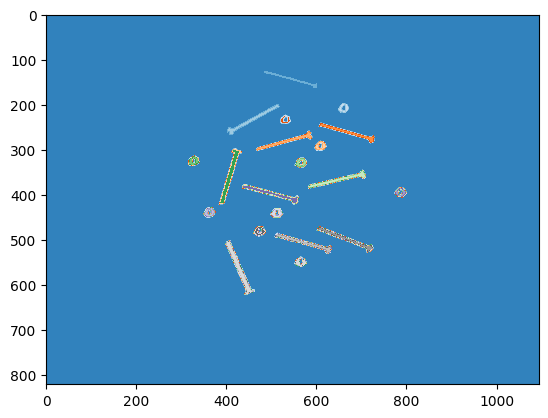

In [11]:
#Plot da imagem + Número de Componentes Conexos
#O Total de componentes conexos é exibido subtraindo o valor 1, pois a própria imagem conta como um componente.

plot.imshow(imgLabels, cmap='tab20c');
print("Total de componentes conexos detectados: " + str(numCCs-1))

In [12]:
#Exibição do vetor com os valores do centro de Cada Componente Conexo.
#Observação: O Primeiro registro representa a imagem inteira, e não somente os componentes conexos detectados.
print(centroids)

[[546.70526601 410.76450308]
 [544.87225042 144.05583756]
 [456.38225539 234.32006633]
 [660.1849711  208.56358382]
 [531.0123839  234.12693498]
 [670.62797075 262.45429616]
 [532.87901701 281.87523629]
 [608.84823848 292.6395664 ]
 [407.55142084 357.81529093]
 [327.20844327 325.7994723 ]
 [565.69230769 329.63925729]
 [649.66159355 367.30528201]
 [500.5624469  398.06542056]
 [786.76900585 395.57894737]
 [362.18421053 439.91315789]
 [511.88121547 441.44475138]
 [473.68611111 481.75833333]
 [666.02212389 498.85663717]
 [573.50499546 507.2479564 ]
 [428.2120383  563.84883721]
 [564.50649351 550.41233766]]


In [13]:
#Exibição da área de cada componente conexo detectado.

for i in range (numCCs):
    print("A área do componente " + str(i) + " é igual a: " + str(stats[i,cv2.CC_STAT_AREA]))

A área do componente 0 é igual a: 882623
A área do componente 1 é igual a: 1182
A área do componente 2 é igual a: 1206
A área do componente 3 é igual a: 346
A área do componente 4 é igual a: 323
A área do componente 5 é igual a: 1094
A área do componente 6 é igual a: 1058
A área do componente 7 é igual a: 369
A área do componente 8 é igual a: 1478
A área do componente 9 é igual a: 379
A área do componente 10 é igual a: 377
A área do componente 11 é igual a: 1117
A área do componente 12 é igual a: 1177
A área do componente 13 é igual a: 342
A área do componente 14 é igual a: 380
A área do componente 15 é igual a: 362
A área do componente 16 é igual a: 360
A área do componente 17 é igual a: 1130
A área do componente 18 é igual a: 1101
A área do componente 19 é igual a: 1462
A área do componente 20 é igual a: 308


In [14]:
#Inicia-se as variáveis Parafusos e Porcas para contagem no laço abaixo
parafusos = 0
porcas = 0

In [15]:
#Executa-se um Laço de repetição indo de 0 ao número de componentes conexos detectados, onde:
    #Quando a área for maior que 850 e menor que 3500, o objeto será classificado como Parafuso
    #Quando a área for maior que 255 e menor que 850, o objeto será classificado como Porca

#Após a classificação, executa-se uma contagem de itens e uma exibição de mensagem informando a área do componente.

for i in range (numCCs):
    if stats[i,cv2.CC_STAT_AREA] > 850 and stats[i,cv2.CC_STAT_AREA] < 3500:
        parafusos = parafusos + 1
    if stats[i,cv2.CC_STAT_AREA] > 255 and stats[i,cv2.CC_STAT_AREA] < 850:
        porcas = porcas + 1

In [16]:
#Exibição do total de parafusos e porcas
print("Total de Parafusos: " + str(parafusos))
print("Total de Porcas: " + str(porcas))

Total de Parafusos: 10
Total de Porcas: 10


In [17]:
#Validação Final

#Falta de Parafusos e/ou Porcas
# 10 Parafusos e 10 Porcas = Conjunto Aprovado!
# < 10 Parafusos e 10 Porcas = Conjunto Reprovado, Restam n Parafusos
# 10 Parafusos e < 10 Porcas = Conjunto Reprovado, Restam n Porcas
# < 10 Parafusos e < 10 Porcas = Conjunto Reprovado, Restam n Parafusos e n Porcas

if parafusos == 10 and porcas == 10:
    print("Conjunto Aprovado!")
elif parafusos < 10 and porcas == 10:
    print("Conjunto Reprovado! Falta(m): " + str((10 - parafusos)) + " Parafuso(s)")
elif parafusos == 10 and porcas < 10:
    print("Conjunto Reprovado! Falta(m): " + str((10 - porcas)) + " Porca(s)")
elif parafusos < 10 and porcas < 10:
    print("Conjunto Reprovado! Falta(m): " + str((10 - parafusos)) + " Parafuso(s) e " + str((10 - porcas)) + " Porca(s)")

Conjunto Aprovado!
